<a href="https://colab.research.google.com/github/linlih/fastai/blob/master/fastai_course_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install fastai

In [0]:
from fastai.imports import *

In [0]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [0]:
# Get the file from fast.ai URL, unzip it, and put it into the folder 'data'
# This uses -qq to make the unzipping less verbose.
!wget http://files.fast.ai/data/dogscats.zip && unzip -qq dogscats.zip -d data/

In [0]:
PATH = "./data/dogscats/" # refer to left file tab to locat the file location
sz = 224  # numbers of images used to train

In [8]:
torch.cuda.is_available() # make sure the nvida GPU works fine, colab has pre-set it well

True

In [9]:
torch.backends.cudnn.enabled # alse need to make sure the Nvida CuDNN works fine

True

In [10]:
os.listdir(PATH)

['models', 'sample', 'test1', 'valid', 'train']

In [13]:
os.listdir(f'{PATH}valid')

['dogs', 'cats']

In [14]:
files = os.listdir(f'{PATH}valid/cats')[:5]
files

['cat.5631.jpg',
 'cat.2173.jpg',
 'cat.11600.jpg',
 'cat.4058.jpg',
 'cat.5973.jpg']

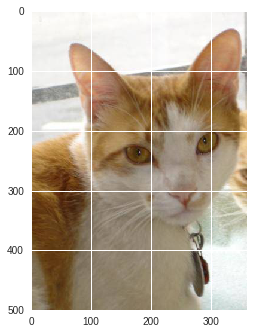

In [17]:
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img)

In [19]:
img.shape

(500, 361, 3)

In [21]:
img[:4,:4]

array([[[245, 244, 240],
        [245, 244, 240],
        [245, 244, 240],
        [245, 244, 240]],

       [[246, 245, 241],
        [246, 245, 241],
        [246, 245, 241],
        [246, 245, 241]],

       [[246, 245, 241],
        [246, 245, 241],
        [246, 245, 241],
        [246, 245, 241]],

       [[247, 246, 242],
        [247, 246, 242],
        [247, 246, 242],
        [247, 246, 242]]], dtype=uint8)

In [26]:
# using the pre-trained model to build a model to classify dog and cat
# the model called resnet34, whick wins the 2015 ImageNet competition
arch = resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2) # first param is learning rate, second param is epoch

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 112491379.08it/s]


100%|██████████| 32/32 [00:15<00:00,  4.05it/s]


epoch      trn_loss   val_loss   accuracy   
    0      0.045912   0.030452   0.9895    
    1      0.04205    0.026986   0.9905    



[array([0.02699]), 0.9905]

In [27]:
# The label for a val data
data.val_y

array([0, 0, 0, ..., 1, 1, 1])

In [28]:
data.classes

['cats', 'dogs']

In [30]:
log_preds = learn.predict()
log_preds.shape

(2000, 2)

In [34]:
log_preds[:10] # give us the probility of two classes in every image

array([[ -0.00467,  -5.36964],
       [ -0.00022,  -8.41465],
       [ -0.00004, -10.05697],
       [ -0.00315,  -5.76191],
       [ -0.00119,  -6.73781],
       [ -0.00152,  -6.49281],
       [ -0.00012,  -9.05611],
       [ -0.     , -12.3123 ],
       [ -0.00012,  -8.99256],
       [ -0.00008,  -9.47351]], dtype=float32)

In [0]:
preds = np.argmax(log_preds, axis=1) # 取出当中最大的值，按照列的方式(axis=1)
probs = np.exp(log_preds[:,1]) # 取对数得到相应的概率值

In [0]:
def rand_by_mask(mask):
    return np.random.choice(np.where(mask)[0], min(len(preds), 4), replace=False)
def rand_by_correct(is_correct):
    return rand_by_mask((preds == data.val_y) == is_correct)

In [0]:
def plots(ims, figsize=(12, 6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [0]:
def load_img_id(ds, idx):
    return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds, x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles = title_probs, figsize=(16,8)) if len(imgs)>0 else print('Not Found.')

Correctly classified


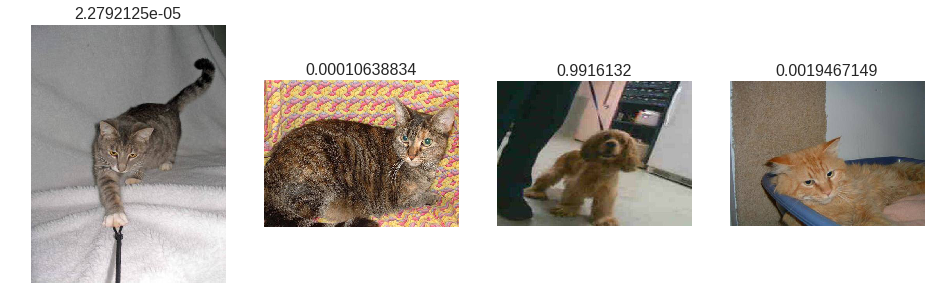

In [45]:
# 1. A few correct labes at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


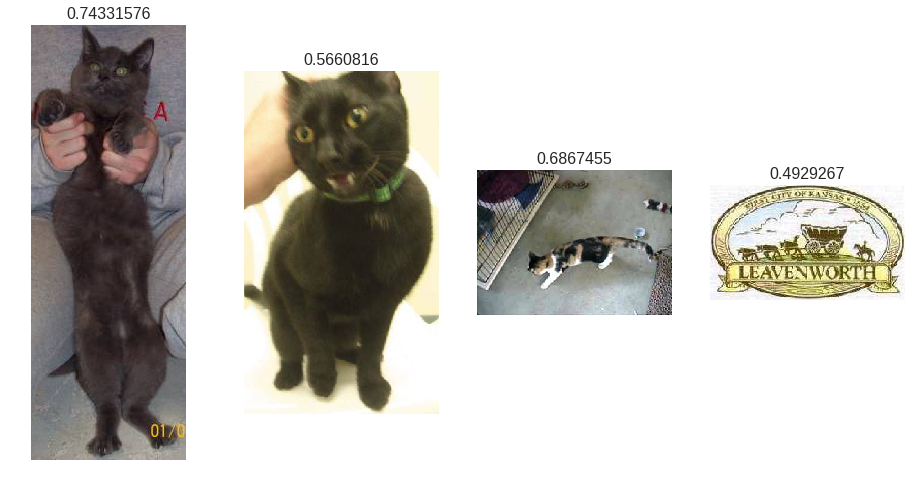

In [46]:
#2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [0]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct):
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y), mult)

Most correct cats


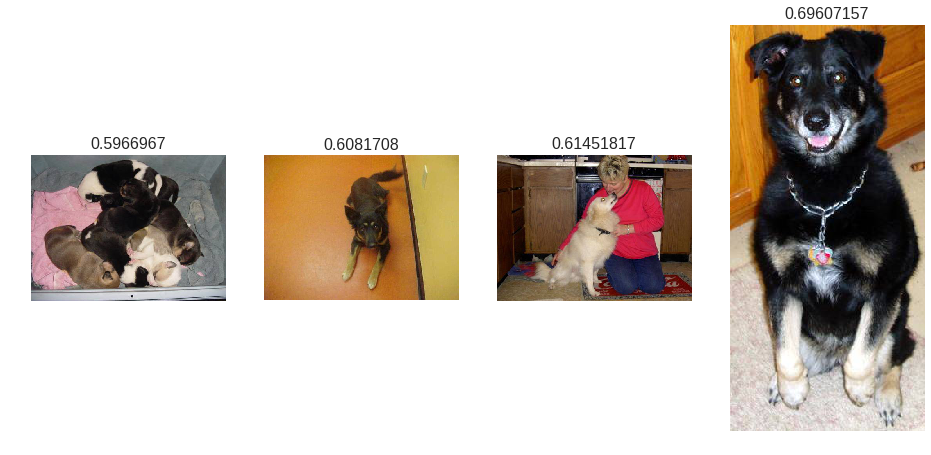

In [56]:
plot_val_with_title(most_by_correct(0, True), "Most correct cats")

Most correct dogs


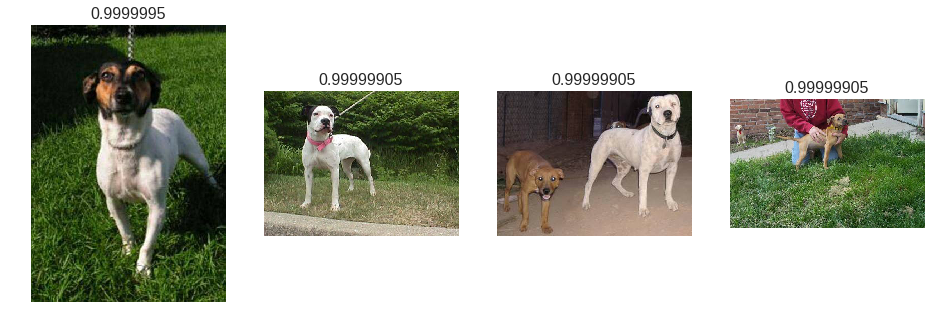

In [50]:
plot_val_with_title(most_by_correct(1, True), "Most correct dogs")

Most incorrect cats


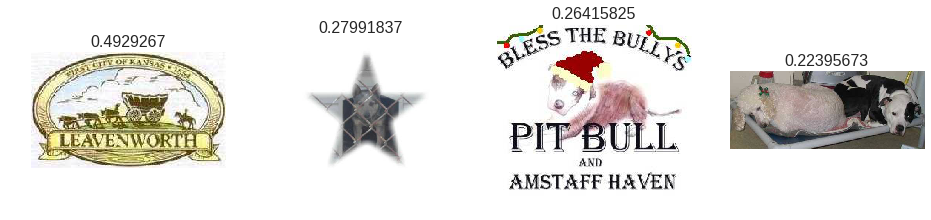

In [57]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


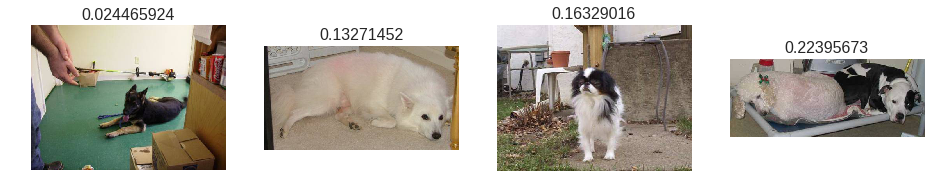

In [58]:

plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

Most uncertain predictions


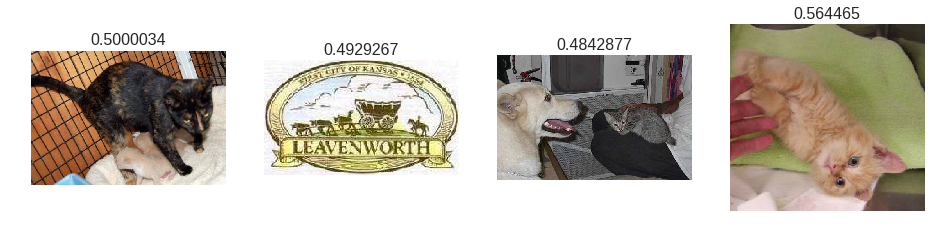

In [59]:
most_uncertain = np.argsort(np.abs(probs-0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

##Choosing a learning rate

In [0]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [61]:
lrf = learn.lr_find()

 80%|████████  | 289/360 [00:06<00:01, 46.07it/s, loss=0.438]


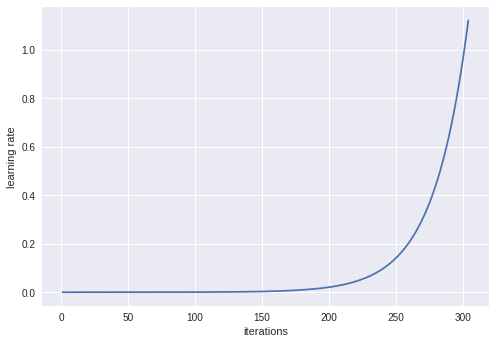

In [62]:
learn.sched.plot_lr()

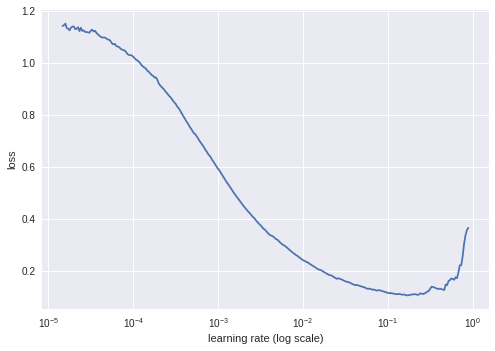

In [63]:
learn.sched.plot() # we can see the best lr = 1e-2(0.01), That's why we used 0.01 as learning rate

## Improving our model

In [0]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [0]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs = 2, tfms=tfms, num_workers=1)
    x, _= next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [0]:
ims = np.stack([get_augs() for i in range(6)])

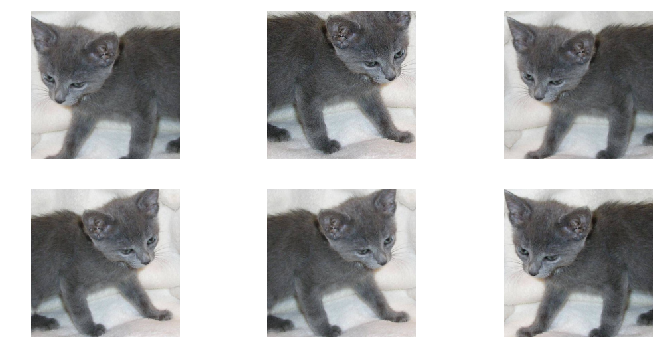

In [69]:
plots(ims, rows=2)

In [0]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [71]:
learn.fit(1e-2, 1)

epoch      trn_loss   val_loss   accuracy   
    0      0.043192   0.028332   0.9905    



[array([0.02833]), 0.9905]

In [0]:
learn.precompute=False

In [73]:
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.047629   0.026837   0.991     
    1      0.047284   0.030245   0.989     
    2      0.049671   0.028408   0.9885    



[array([0.02841]), 0.9885]

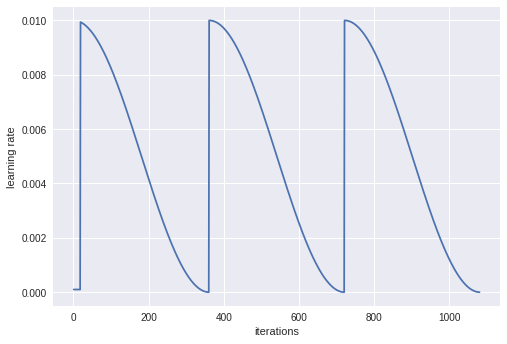

In [75]:
learn.sched.plot_lr()

In [0]:
learn.save('224_lastlayer')

In [0]:
learn.load('224_lastlayer')

In [0]:
learn.unfreeze()

In [0]:
lr = np.array([1e-4, 1e-3, 1e-2])

In [82]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.054959   0.030354   0.9875    
    1      0.040188   0.022894   0.9885    
    2      0.03328    0.021406   0.9915    
    3      0.032084   0.019576   0.9915    
    4      0.023749   0.022228   0.991     
    5      0.022122   0.021038   0.9905    
    6      0.018623   0.019794   0.9915    



[array([0.01979]), 0.9915]

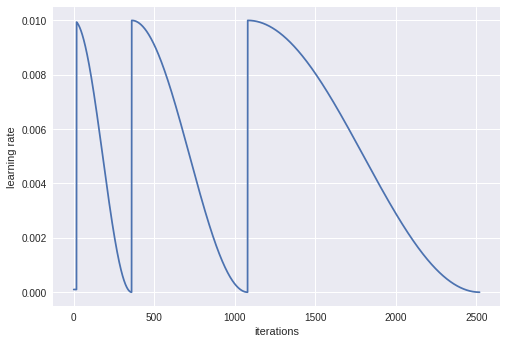

In [84]:
learn.sched.plot_lr()

In [0]:
learn.save('224_all')

In [0]:
learn.load('224_all')

In [87]:
log_preds, y = learn.TTA()
probs = np.mean(np.exp(log_preds), 0)

In [89]:
accuracy_np(probs, y)

0.9935

## Analyzing results

In [0]:
preds = np.argmax(probs, axis=1)
probs = probs[:1]

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[994   6]
 [  7 993]]


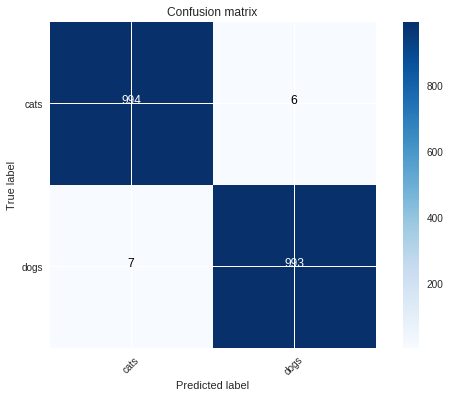

In [93]:
plot_confusion_matrix(cm, data.classes)

## Analyzing results: loss and accuracy

In [0]:
def binary_loss(y, p):
    return np.mean(-(y * np.log(p) + (1 - y)*np.log(1-p)))

In [104]:
acts = np.array([1, 0, 0, 1])
preds = np.array([0.9, 0.1, 0.2, 0.8])
binary_loss(acts, preds)

0.164252033486018

## Review: steps to train a image classifier



1.   precompute = True
2.   Use lr_find()  to find highest learning rate where loss is still clearly improving
3.   Train last layer from precomputed activations for 1-2 epochs
4.   Train last layer with data augmentation(i.e. precompute=False) for 2-3 epochs with cycle_len = 1
5.   Unfreeze all layers
6.   Set earlier layer to 3x-10x lower learning rate than next higher layer
7.   Use lr_find() again
8.   Train full network with cycle_mult=2 until over-fitting



## **Which filed you can use the DL?**

Here are some examples:

Fraud Detection

Sales Forecasting

Product failure prediction

Pricing

Credit risk

Customer retention / churn

Recommendation systems

Ad optimization

Anti-money laundering

Resume screening

Sales prioritization

Call center routing

Store layout

Store location optimization

Staff scheduling

## Some tips for jupter notebook

tab : get the autocomplete recommendation

tab + shift : get the param intro of function (Notice: the press order cann't be changed)

tab + tab : press twice tab can give you the infor about the function

??function : this method can see the source code of function

?function : give the documentation of the function